## CULane Dataset Visualization

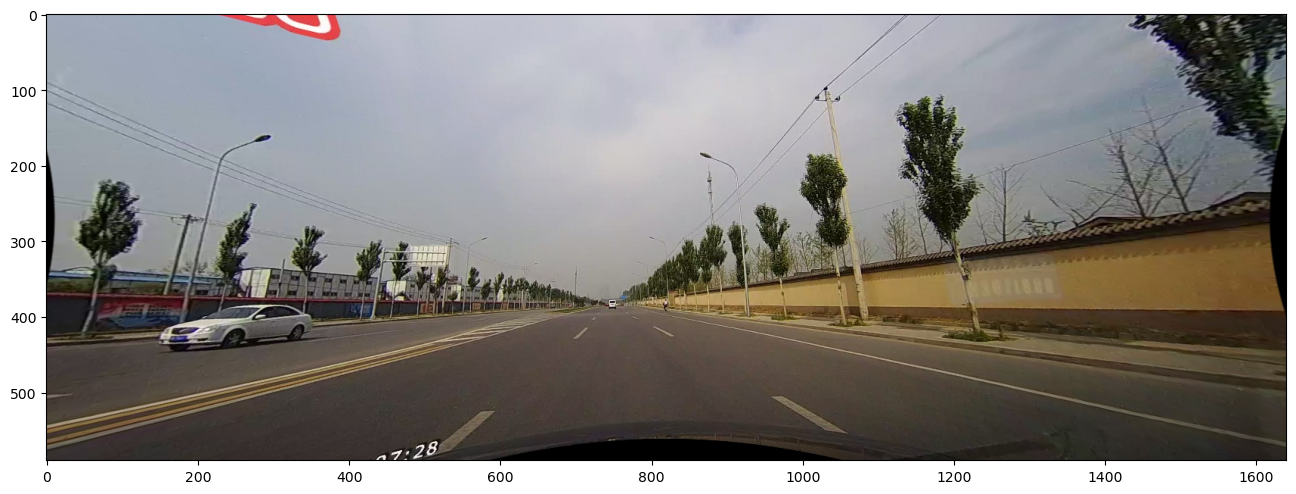

In [1]:
import matplotlib.pyplot as plt
import cv2

img1= cv2.imread("/kaggle/input/lanelinedata/imgs/06030907_0771.MP4/00000.jpg")
img1= cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.figure(figsize= (16,18))
plt.imshow(img1)

In [2]:
fin= open("/kaggle/input/d/pendemsanjay/culane/images_and_lines/06030907_0771.MP4/00000.lines.txt", "r")
print(fin.read())

-9.30514 590 27.27 580 63.0984 570 99.8906 560 136.532 550 172.209 540 208.851 530 245.492 520 282.134 510 318.237 500 354.879 490 390.556 480 427.197 470 463.838 460 500.48 450 536.584 440 573.225 430 608.902 420 645.544 410 682.185 400 718.827 390 
506.796 590 517.4 580 529.082 570 540.604 560 551.966 550 563.328 540 575.448 530 586.81 520 598.172 510 610.25 500 621.612 490 632.974 480 645.093 470 656.455 460 667.817 450 679.895 440 691.257 430 702.619 420 714.739 410 726.101 400 737.463 390 
1103.63 590 1088.05 580 1071.09 570 1053.54 560 1036.23 550 1018.93 540 1001.62 530 984.312 520 967.005 510 950.252 500 932.946 490 915.64 480 898.334 470 881.029 460 863.723 450 846.108 440 828.803 430 811.497 420 795.056 410 777.75 400 760.444 390 
1651.54 570 1603.75 560 1554.79 550 1506.82 540 1458.84 530 1410.86 520 1362.88 510 1313.96 500 1265.98 490 1218.01 480 1170.03 470 1121.07 460 1073.09 450 1025.26 440 977.279 430 928.322 420 880.344 410 832.366 400 784.388 390 



1. There are 4 lines in the text file each representing 4 lanes detected in the image<br>
2. Each line has x and y coordinates of multiple points present on that line

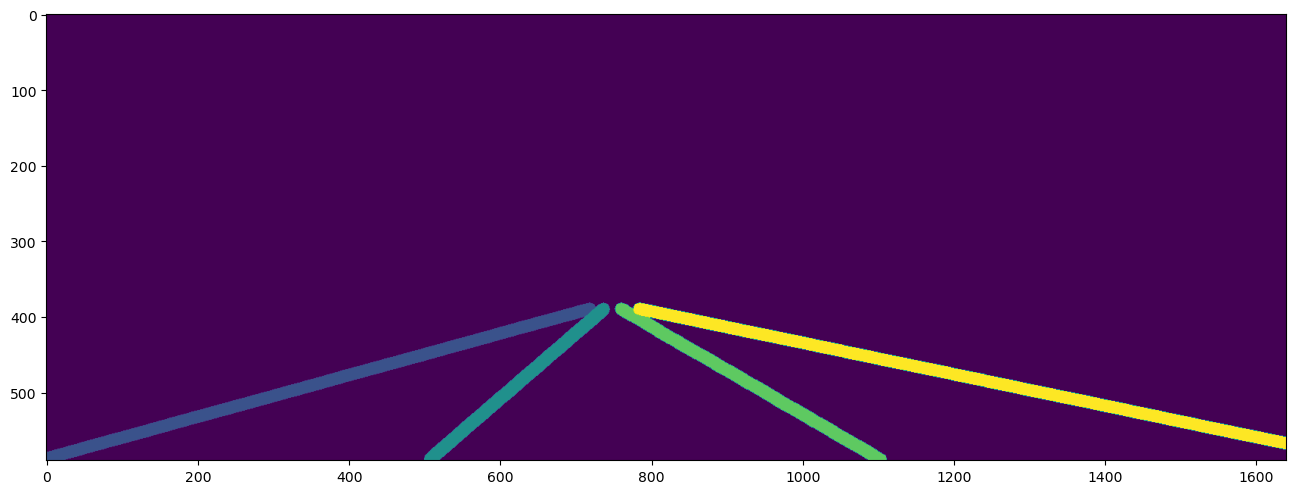

In [3]:
mask1= cv2.imread("/kaggle/input/lanelinedata/masks/06030907_0771.MP4/00000.png", cv2.IMREAD_GRAYSCALE)
#mask= cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
plt.figure(figsize= (16,18))
plt.imshow(mask1)

1. Read each line of the file
2. Remove trailing/ leading whitespaces
3. Seperate every coordinate
4. Remove the first two coordinates (those coordinates lie in the edge of the image)

In [4]:
points= []
file= "/kaggle/input/d/pendemsanjay/culane/images_and_lines/06030907_0771.MP4/00000.lines.txt"
with open(file) as f:
    for line in f:
        line= line.strip()
        l= line.split(" ")
        points.append([int(eval(x)) for x in l[2:]])

Output the image with the coordinates:<br>
1. Draw circle(a dot) for each (x,y)

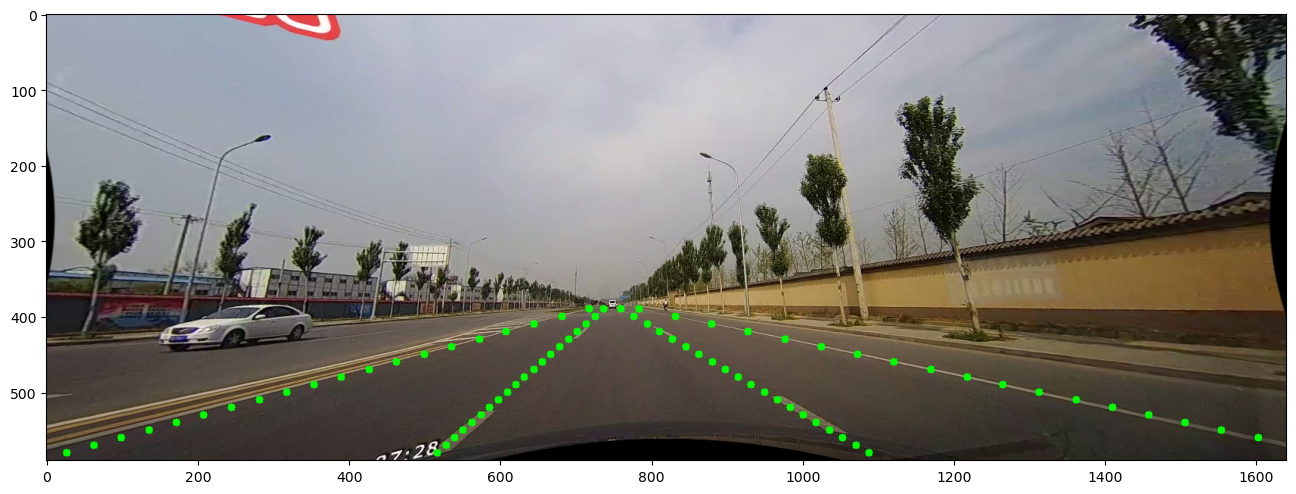

In [5]:
import cv2
for i in range(0,points.__len__()):
    for j in range(0,points[i].__len__(),2):
        cv2.circle(img1, (points[i][j],points[i][j+1]),radius= 0, color= (0, 255, 0), thickness= 10)
        
plt.figure(figsize= (16,18))
plt.imshow(img1)        

1. Masking the image

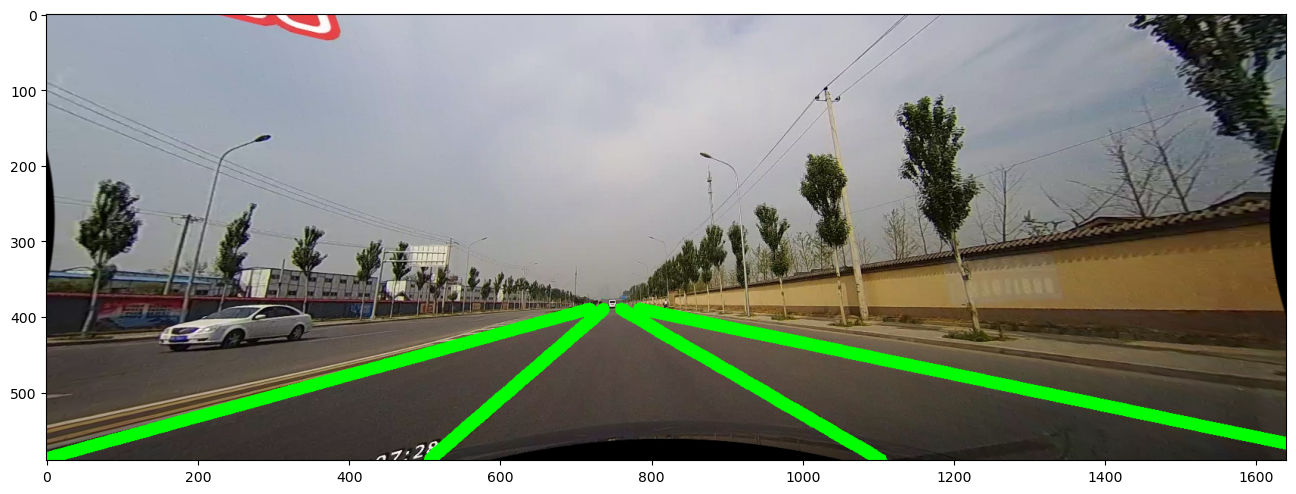

In [6]:
result1 = img1.copy()
result1[mask1!=0] = (0,255,0)
plt.figure(figsize= (16,18))
plt.imshow(result1)

----------------------------------------------del beginning----------------------------------

## Data Preprocessing

Now, for the whole dataset:
1. create a list of images
2. Its labels
3. mean and std of the data (coordinates)
4. create a seperate 'coordinates' list from the labels

In [7]:
# def clean_text_file(fname):
#     data=[]
#     coordinates =[]
#     fin = open(fname).readlines()
#     for line in fin:
#         data.extend([int(eval(x)) for x in line.rstrip('\n').split(" ")[2:]  if x!=''])
    
#     data = np.array(data)          
#     if(len(data)==0):
#         return None

#     return data
    
    

In [8]:
import os
import numpy as np
from os import walk

images=[]
masks=[]
for dirpath, dirnames, filenames in walk("/kaggle/input/lanelinedata/imgs"):
    for files in filenames :
        if(files.split(".")[-1]== "jpg"):
            images.append(os.path.join(dirpath,files))
                
for dirpath, dirnames, filenames in walk("/kaggle/input/lanelinedata/masks"):
    for files in filenames :
        if(files.split(".")[-1]== "png"):
            masks.append(os.path.join(dirpath,files))           


            

In [9]:
print("Number of Images:",len(images))
print("Number of Masks:", len(masks))

images= sorted(images)
masks= sorted(masks)

Number of Images: 18233
Number of Masks: 18233


In [10]:
images[:3]

['/kaggle/input/lanelinedata/imgs/06030819_0755.MP4/00000.jpg',
 '/kaggle/input/lanelinedata/imgs/06030819_0755.MP4/00090.jpg',
 '/kaggle/input/lanelinedata/imgs/06030819_0755.MP4/00180.jpg']

In [11]:
masks[:3]

['/kaggle/input/lanelinedata/masks/06030819_0755.MP4/00000.png',
 '/kaggle/input/lanelinedata/masks/06030819_0755.MP4/00090.png',
 '/kaggle/input/lanelinedata/masks/06030819_0755.MP4/00180.png']

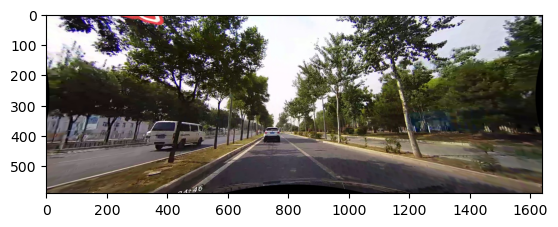

In [12]:
plt.imshow(plt.imread(images[906]))

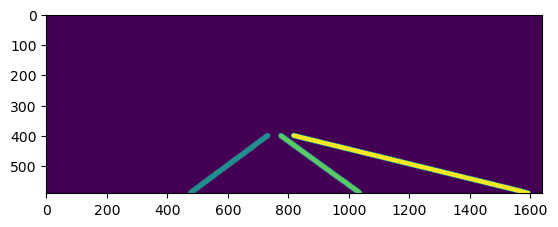

In [13]:
plt.imshow(plt.imread(masks[906], cv2.IMREAD_GRAYSCALE))

In [14]:
# print('Number of Images, labels:',len(img_files),',', len(label_data))